# Feature extraction + KMeans

### Tfidf : Feature extraction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [27]:
final_dataset = pd.read_csv("datacleaned/df_10000.CSV")
final_dataset = final_dataset.drop(['Unnamed: 0'], axis=1) #remove columns creted bc of the to_csv() in the cleaning
final_dataset = final_dataset.iloc[0:10000]
print(final_dataset.shape)
for i in final_dataset['corps']:
    if ('nan' in i) and (len(i)<100):
        print(i)
        break

# final_dataset = final_dataset.loc(final_dataset['corps'] != ['nan'])
print(final_dataset.isna().sum().sum())
final_dataset.head()

(10000, 3)
['monoprix', 'operation', 'rcs', 'nanterre']
0


,objet,corps,adresse
0,"[']', 'mission', 'promotion', 'important', 'me...","['dear', 'student', 'ambassador', 'lutt', 'you...","['etudiants-request', 'utt', 'fr']"
1,"[']', 'message', 'pierre', 'koch', 'personal',...","['english', ']', 'dear', 'fellow', 'student', ...","['etudiants-request', 'utt', 'fr']"
2,"['your', 'instagram', 'password', 'change']","['this', 'confirmation', 'password', 'instagra...","['no-reply', 'mail.instagram', 'com']"
3,"[']', 'fwd', 'challenge', 'inter', 'entreprise...","['de', 'michel', 'legault', 'sport', 'cc', 'sd...","['sport-request', 'utt', 'fr']"
4,"['confirmation', 'ter', 'ticket', 'order']","['confirmation', 'trip', 'monday', 'november',...","['mesbilletsTER-noreply', 'ter-sncf', 'fr']"


In [36]:
# initialize the vectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(final_dataset['corps'])

print(f"n_samples: {X.shape[0]}, n_features: {X.shape[1]}")

words = vectorizer.get_feature_names()


n_samples: 10000, n_features: 34191


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### PCA

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 4059)

### Run le kmeans avec differents nb de clusters en vue de la elbow method

In [39]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


In [40]:
print('Found distortion for {} clusters'.format(k))

Found distortion for 29 clusters


### Plot les résultats : elbow method

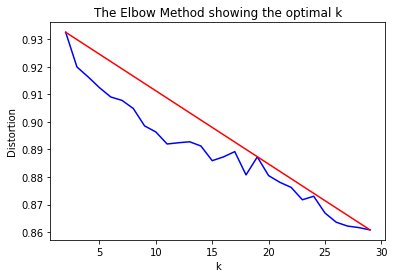

In [41]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### run le kmeans avec le nombre optimal du elbow (k= 12)

In [42]:
k = 12
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
final_dataset['cluster'] = y_pred

### Reduction de dimension avec t-SNE

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.921s...
[t-SNE] Computed neighbors for 10000 samples in 70.380s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.216621
[t-SNE] KL divergence after 1000 iterations: 1.787715


### A quoi ressemblent nos données en 2 dimensions

In [47]:
X_embedded[:,0]

array([ 15.166223, -26.97739 , -47.946156, ..., -68.52862 ,  14.657901,
        64.769104], dtype=float32)

<ipython-input-48-979414306be9>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)


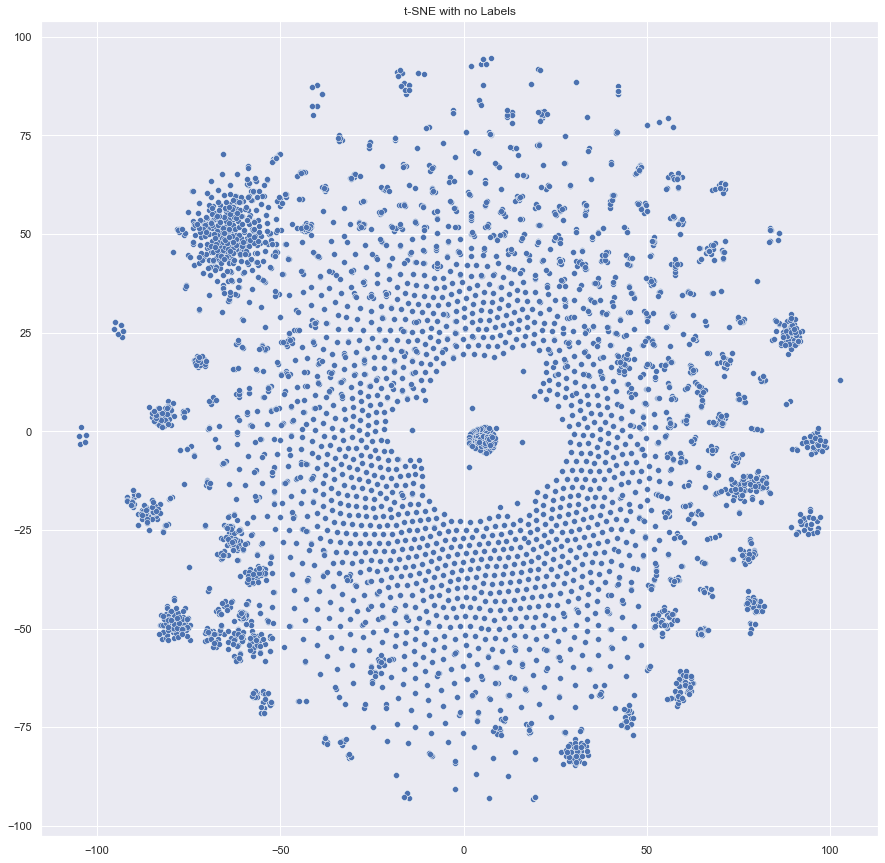

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_10kemails.png")
plt.show()

### On colore avec les labels

<ipython-input-50-3f85ed0c34ff>:12: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)


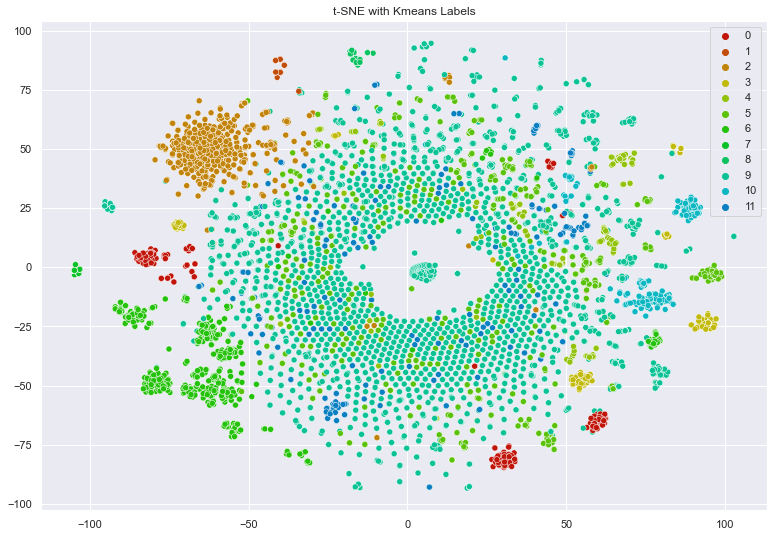

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne_10kemails.png")
plt.show()

### Topic modelling (avec LDA)

In [52]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizers = []
    
for ii in range(0, 12):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [54]:
vectorizers[0]

CountVectorizer(max_df=0.9, min_df=5, stop_words='english',
                token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}')

In [65]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(final_dataset.loc[final_dataset['cluster'] == current_cluster, 'corps']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [67]:
len(vectorized_data)

12

In [76]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 12


lda_models = []

for ii in range(0, 12):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=12,
                          random_state=42, verbose=False)

<537x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 31626 stored elements in Compressed Sparse Row format>

In [77]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_cluster))

    if current_cluster < 12:
        if (vectorized_data[current_cluster] != None):
            clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11


In [78]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [79]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11


C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
i=0
for w in all_keywords:
    print("KEYWORDS pour le cluster "+str(i)+" : ", w)
    i=i+1



KEYWORDS pour le cluster 0 :  ['lydia', 'paris', 'offer', 'stage', 'work', 'new', 'transfer', 'change', 'payment', 'free', 'month', 'communication', 'placement', 'account', 'eur', 'bank', 'head', 'kid', 'use']
KEYWORDS pour le cluster 1 :  ['rent', 'studio', 'room']
KEYWORDS pour le cluster 2 :  ['lutt', 'address', 'troyes', 'sport', 'isi', 'prevent', 'decline', 'day', 'holiday', 'activity', 'student', 'par', 'registration', 'piece', 'international', 'content', 'use', 'send', 'semester', 'michel', 'mission', 'baptiste', 'guichard', 'list', 'document', 'benoit', 'fellow', 'enrich', 'reopen']
KEYWORDS pour le cluster 3 :  ['digitale', 'converse', 'write', 'lusine', 'cnil', 'right', 'address', 'gaulle', 'infopro', 'mail', 'send', 'datum', 'contact', 'personal', 'essec', 'school', 'advert', 'business', 'ndeg', 'deposit']
KEYWORDS pour le cluster 4 :  ['june', 'day', 'apr', 'oct', 'hollyhill', 'price', 'event', 'central', 'wednesday', 'time', 'thursday', 'summer', 'tuesday', 'jul', 'list', 

In [ ]:
len(all_keywords)

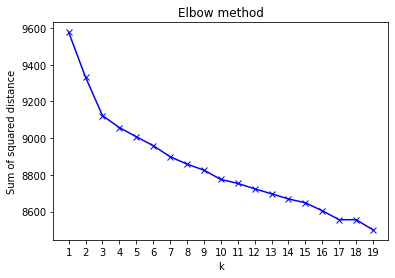

In [5]:
# # # initialize kmeans with 3 centroids
# # kmeans = KMeans(n_clusters=3, random_state=42)
# # # fit the model
# # kmeans.fit(X)
# # # store cluster labels in a variable
# # clusters = kmeans.labels_

# def find_optimal_clusters(data, max_k):
#     Sum_of_squared_distance = []
#     K = range(1,max_k)
#     for k in K:
#         km = KMeans(n_clusters = k)
#         km = km.fit(data)
#         Sum_of_squared_distance.append(km.inertia_)
#     plt.plot(K, Sum_of_squared_distance, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('Sum of squared distance')
#     plt.title('Elbow method')
#     plt.xticks(K)
#     plt.show()
    
# find_optimal_clusters(X, 20)

In [6]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=12, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_



In [31]:
unique, counts = np.unique(clusters, return_counts=True)
d = dict(zip(unique, counts))
d

{0: 4145,
 1: 800,
 2: 690,
 3: 624,
 4: 125,
 5: 876,
 6: 232,
 7: 61,
 8: 178,
 9: 74,
 10: 1987,
 11: 208}

In [33]:
df_k = final_dataset
df_k['clusters'] = clusters
df_k0 = df_k.loc[df_k['clusters'] == 7]
df_k0

,objet,corps,adresse,clusters
23,['nan'],['nan'],"['sam.noel', 'utt', 'fr']",7
271,['papier'],['nan'],"['vwalbaum73', 'gmail', 'com']",7
536,['nan'],['nan'],"['antoinetommasi', 'me', 'com']",7
630,['music'],['nan'],"['sam.noel', 'utt', 'fr']",7
693,"['gantt', 'pauluitoo']",['nan'],"['paul.duperray', 'hotmail', 'com']",7
...,...,...,...,...
9452,['nan'],['nan'],"['chi_nguyen.tran', 'utt', 'fr']",7
9455,['nan'],['nan'],"['jfbenoit', 'erinette', 'fr']",7
9834,['prod'],['nan'],"['can.u.beats', 'gmail', 'com']",7
9883,['cvec'],['nan'],"['verojf', 'wanadoo', 'fr']",7


In [7]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : hello, the, good, we, student, de, project, you, course, day
1 : baptiste, application, datum, we, thank, guichard, good, contact, position, internship
2 : linkedin, ireland, wilton, unlimited, company, plaza, oscar, france, dublin, network
3 : message, attachment, possible, utt, contamination, cause, internet, damage, immediately, virus
4 : password, connection, character, change, my, ip, use, different, do, account
5 : troyes, university, student, utt, technology, marie, curie, cs, rue, tel
6 : store, monoprix, offer, valid, monoprixfr, selection, history, immediate, eur, product
7 : nan, 的startup, federative, federe, federer, federerer, federico, fedfefaedb, fee, feeb
8 : lydia, account, intermediaire, avenue, eur, paris, solution, sum, operation, stockx
9 : duty, give, job, matta, nada, work, you, deliver, feedback, your
10 : eur, account, we, email, you, your, please, message, paris, receive
11 : eur, particulier, rental, paris, stage, apartment, month, search, ad, correspond


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

NameError: name 'x' is not defined